In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython import display as ICD
from nba_api.stats.endpoints import leaguegamefinder, boxscoreplayertrackv2, playercareerstats, teamplayerdashboard, leaguestandings
from nba_api.stats.static import players, teams

import numpy as np
import statsmodels.api as sm

import time

import warnings
warnings.filterwarnings("ignore")

# Team Standings

In [2]:
all_games = leaguegamefinder.LeagueGameFinder().get_data_frames()[0]

In [3]:
mapping = {'DEN':"1610612743", 
           'SAS':"1610612759", 
           'IND':"1610612754", 
           'MEM':"1610612763", 
           'NOP':"1610612740", 
           'CHI':"1610612741", 
           'MIN':"1610612750", 
           'MIA':"1610612748", 
           'ATL':"1610612737",
           'ORL':"1610612753", 
           'SAC':"1610612758", 
           'UTA':"1610612762", 
           'CHA':"1610612766", 
           'WAS':"1610612764", 
           'HOU':"1610612745", 
           'PHX':"1610612756", 
           'OKC':"1610612760", 
           'POR':"1610612757",
           'LAC':"1610612746", 
           'GSW':"1610612744", 
           'PHI':"1610612755", 
           'LAL':"1610612747", 
           'BKN':"1610612751", 
           'TOR':"1610612761", 
           'BOS':"1610612738", 
           'MIL':"1610612749", 
           'DET':"1610612765",
           'CLE':"1610612739", 
           'NYK':"1610612752"}

In [4]:
league_standings = leaguestandings.LeagueStandings().get_data_frames()[0]
league_standings[['TeamName','PointsPG','OppPointsPG']]

,TeamName,PointsPG,OppPointsPG
0,Lakers,113.4,106.8
1,Bucks,118.6,107.8
2,Raptors,112.7,106.1
3,Clippers,116.1,109.6
4,Celtics,113.6,107.5
5,Nuggets,110.8,108.1
6,Jazz,110.9,108.1
7,Heat,112.2,108.8
8,Pacers,109.8,107.5
9,Thunder,110.7,108.0


# Getting Team 2019 Game Data

In [5]:
nba_teams = teams.get_teams()
mavs_id = [team for team in nba_teams
         if team['full_name'] == 'Dallas Mavericks'][0]['id']
opponent_id = [team for team in nba_teams
         if team['full_name'] == 'Los Angeles Clippers'][0]['id']

In [6]:
from nba_api.stats.endpoints import teamplayerdashboard
mavs_season_stats = teamplayerdashboard.TeamPlayerDashboard(mavs_id).get_data_frames()[1]
mavs_season_stats['PPG'] = mavs_season_stats['PTS']/mavs_season_stats['GP']
mavs_season_stats['MPG'] = mavs_season_stats['MIN']/mavs_season_stats['GP']
mavs_season_stats

,GROUP_SET,PLAYER_ID,PLAYER_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PPG,MPG
0,Players,1628499,Antonius Cleveland,9,5,4,0.556,29.171667,2,8,0.250,0,2,0.000,3,4,0.750,0,3,3,0,1,1,1,1,4,2,7,-7,15.6,0,0,16,17,4,14,18,17,17,17,16,17,16,16,16,13,17,17,17,18,17,18,17,4,2,16,17,18,18,10,2,0.777778,3.241296
1,Players,1626246,Boban Marjanovic,40,20,20,0.500,354.908333,103,183,0.563,4,15,0.267,37,50,0.740,59,104,163,15,26,7,7,13,52,46,247,66,481.1,5,0,10,11,10,17,12,11,11,3,15,14,14,10,10,15,7,11,8,12,11,12,10,11,9,10,11,9,11,3,2,6.175000,8.872708
2,Players,201584,Courtney Lee,24,15,9,0.625,345.488333,40,82,0.488,21,47,0.447,6,7,0.857,7,25,32,12,11,18,6,0,33,5,107,39,224.4,0,0,13,12,7,2,13,13,13,6,11,12,3,14,15,4,14,15,15,13,13,10,11,1,8,14,13,11,13,10,2,4.458333,14.395347
3,Players,1626153,Delon Wright,68,40,28,0.588,1469.320000,182,392,0.464,46,122,0.377,75,94,0.798,67,199,266,226,70,78,22,29,88,88,485,40,1373.2,1,0,2,1,17,9,7,7,7,8,7,8,7,6,7,10,6,5,5,2,3,1,4,15,12,6,7,10,6,7,2,7.132353,21.607647
4,Players,1627827,Dorian Finney-Smith,67,39,28,0.582,1999.135000,222,485,0.458,103,280,0.368,77,106,0.726,136,246,382,104,68,45,37,29,166,85,624,286,1416.4,4,0,3,3,17,11,1,5,5,10,6,6,9,5,5,16,1,4,3,6,4,3,3,15,18,8,5,2,5,4,2,9.313433,29.837836
5,Players,203939,Dwight Powell,40,25,15,0.625,1060.538333,146,229,0.638,10,39,0.256,74,111,0.667,75,152,227,59,36,34,22,13,102,116,376,195,868.9,1,0,10,10,9,2,8,9,10,2,13,13,15,7,4,17,4,7,6,10,9,7,4,11,13,5,9,5,9,7,2,9.400000,26.513458
6,Players,200826,J.J. Barea,27,14,13,0.519,404.481667,74,182,0.407,29,76,0.382,18,20,0.900,10,39,49,100,35,5,2,7,25,38,195,30,389.8,0,0,12,13,8,16,11,12,12,14,10,10,6,12,12,2,13,13,13,7,10,13,15,8,7,12,12,12,12,10,2,7.222222,14.980802
7,Players,1628973,Jalen Brunson,57,34,23,0.596,1022.073333,181,388,0.466,43,120,0.358,61,75,0.813,22,112,134,188,66,22,4,11,74,118,466,172,920.8,2,0,7,8,12,6,9,8,8,7,9,9,10,9,9,8,11,10,11,3,5,8,13,9,11,4,8,7,8,5,2,8.175439,17.931111
8,Players,1629729,Josh Reaves,2,1,1,0.500,1.485000,0,1,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,-5,0.0,0,0,19,18,1,17,19,19,19,19,16,19,16,19,19,19,17,19,19,18,19,19,18,1,1,19,19,17,19,10,2,0.000000,0.742500
9,Players,1628382,Justin Jackson,60,37,23,0.617,953.710000,125,316,0.396,46,155,0.297,36,44,0.818,27,118,145,49,12,12,10,14,58,41,332,17,633.5,0,0,6,5,12,4,10,10,9,15,7,7,13,11,11,7,8,8,9,11,12,11,8,13,10,11,10,13,10,10,2,5.533333,15.895167


In [13]:
opponent_season_stats = teamplayerdashboard.TeamPlayerDashboard(opponent_id).get_data_frames()[1]
opponent_season_stats['PPG'] = opponent_season_stats['PTS']/opponent_season_stats['GP']
opponent_season_stats['MPG'] = opponent_season_stats['MIN']/opponent_season_stats['GP']

opponent_season_stats

,GROUP_SET,PLAYER_ID,PLAYER_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PPG,MPG
0,Players,1629599,Amir Coffey,15,8,7,0.533,107.125000,15,36,0.417,3,10,0.300,1,3,0.333,4,10,14,10,6,1,1,3,14,3,34,-17,65.8,0,0,15,17,6,19,17,17,16,12,16,17,14,20,20,20,16,17,17,17,16,19,17,5,4,19,18,18,18,8,2,2.266667,7.141667
1,Players,1628476,Derrick Walton Jr.,23,14,9,0.609,221.903333,17,36,0.472,9,21,0.429,7,9,0.778,2,13,15,22,4,4,0,1,19,8,50,4,109.0,0,0,14,14,7,17,16,16,16,6,13,13,4,16,16,10,19,16,16,15,18,15,19,2,5,16,16,14,16,8,2,2.173913,9.647971
2,Players,1627826,Ivica Zubac,67,45,22,0.672,1220.660000,211,350,0.603,0,2,0.000,115,154,0.747,175,310,485,73,60,16,63,27,159,114,537,223,1405.5,8,0,1,1,20,10,7,5,6,2,18,18,18,5,5,12,1,2,1,7,6,10,2,16,20,5,5,5,5,3,2,8.014925,18.218806
3,Players,203210,JaMychal Green,58,39,19,0.672,1198.665000,135,320,0.422,81,217,0.373,32,44,0.727,75,285,360,46,47,25,21,19,155,38,383,134,975.0,7,0,4,4,16,8,8,8,8,11,5,5,9,7,8,13,3,3,4,9,7,7,6,15,18,8,8,8,7,4,2,6.603448,20.666638
4,Players,1629010,Jerome Robinson,42,29,13,0.690,476.006667,46,136,0.338,19,67,0.284,11,19,0.579,5,55,60,46,26,13,8,7,55,21,122,38,300.0,0,0,12,12,8,6,12,13,12,19,10,10,16,14,12,17,14,12,12,9,10,11,11,10,10,12,13,13,12,8,2,2.904762,11.333492
5,Players,201149,Joakim Noah,2,1,1,0.500,17.185000,0,1,0.000,0,0,0.000,5,6,0.833,3,5,8,2,2,0,1,0,6,3,5,-25,18.6,0,0,20,20,1,20,20,20,20,20,18,20,18,17,18,7,17,20,20,19,19,20,17,1,1,19,20,20,20,8,2,2.500000,8.592500
6,Players,1628405,Johnathan Motley,13,8,5,0.615,41.146667,11,15,0.733,1,1,1.000,5,7,0.714,3,7,10,8,5,3,0,1,6,5,28,3,56.0,0,0,17,17,4,16,19,19,19,1,17,19,1,17,17,14,17,19,19,18,17,17,19,2,1,17,19,15,19,8,2,2.153846,3.165128
7,Players,202695,Kawhi Leonard,54,39,15,0.722,1739.885000,499,1069,0.467,114,306,0.373,337,379,0.889,54,335,389,266,145,96,33,38,105,316,1449,448,2556.8,13,1,5,4,12,3,3,1,1,7,2,2,10,1,1,2,5,1,3,2,2,1,3,18,13,1,1,1,1,1,1,26.833333,32.220093
8,Players,1629013,Landry Shamet,50,32,18,0.640,1359.713333,150,367,0.409,107,280,0.382,60,68,0.882,6,88,94,90,39,20,9,13,135,59,467,109,762.8,0,0,9,10,15,14,4,6,5,14,3,4,7,6,6,3,12,11,11,6,9,9,10,13,16,7,6,9,9,8,2,9.340000,27.194267
9,Players,101150,Lou Williams,61,41,20,0.672,1777.936667,370,891,0.415,107,297,0.360,279,324,0.861,29,163,192,350,175,40,10,47,78,257,1126,199,1856.4,2,0,3,3,19,9,1,3,2,13,3,3,12,2,3,6,8,7,8,1,1,5,9,19,12,3,3,6,3,7,2,18.459016,29.146503


In [14]:
# The first DataFrame of those returned is what we want.
curr_mavs_season = leaguegamefinder.LeagueGameFinder(team_id_nullable=mavs_id).get_data_frames()[0]
opponent_season = leaguegamefinder.LeagueGameFinder(team_id_nullable=opponent_id).get_data_frames()[0]

curr_mavs_season = curr_mavs_season[curr_mavs_season['SEASON_ID'] == "22019"]
opponent_season = opponent_season[opponent_season['SEASON_ID'] == "22019"]

## Variance in Player Rotation
Preseason will have greater variance in player rotations. The goal is to use that to forecast PPG and OPPG

In [9]:
def missing_mins(curr_game_id, team_id, df):
    time.sleep(0.5)
    curr_game = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=curr_game_id).get_data_frames()[0]
    player_game_stats = curr_game[curr_game['TEAM_ID'] == int(team_id)]
    combined = pd.merge(df, player_game_stats, how='left', on='PLAYER_ID')
    missing_mins = combined[(combined['MIN_y'] == "0:00") | (combined['MIN_y'].isna())]['MPG'].sum()
    return missing_mins

In [10]:
def variance(curr_game_id, team_id):
    time.sleep(0.5)
    curr_game = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=curr_game_id).get_data_frames()[0]
    minutes = curr_game[curr_game['TEAM_ID'] == int(team_id)]['MIN']
    minutes = minutes.apply(lambda x: int(x[:-3])*60+int(x[-2:]))
    minutes = minutes[minutes != 0]
    return minutes.var()

In [11]:
def create_table(season_copy, season_stats):
    curr_copy = season_copy[:]
    
    curr_copy['datetime'] = curr_copy['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    curr_copy['reg_season'] = curr_copy['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d') >= datetime(2019, 10, 22))

    curr_copy['OPTS'] = curr_copy['PTS'] - curr_copy['PLUS_MINUS']
    
    #filtering for only NBA teams
    curr_copy = curr_copy[curr_copy['MATCHUP'].apply(lambda x: x[-3:] in mapping)]
    
    curr_copy['OPP_TEAM_ID'] = curr_copy['MATCHUP'].apply(lambda x: mapping[x[-3:]])
    
    curr_copy['PPG_a'] = curr_copy['TEAM_ID'].apply(lambda x: league_standings[league_standings['TeamID'] == int(x)]['PointsPG'].iloc[0])
    curr_copy['OPPG_a'] = curr_copy['TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['OppPointsPG'].iloc[0])
    
    curr_copy['PPG_b'] = curr_copy['OPP_TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['PointsPG'].iloc[0])
    curr_copy['OPPG_b'] = curr_copy['OPP_TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['OppPointsPG'].iloc[0])

    curr_copy['O_COEF'] = curr_copy['PTS'] / (curr_copy['PPG_a'] + curr_copy['OPPG_b'])
    curr_copy['D_COEF'] = curr_copy['OPTS'] / (curr_copy['PPG_b'] + curr_copy['OPPG_a'])
    
    print('variance')
    curr_copy['VARIANCE'] = curr_copy.apply(lambda x: variance(x['GAME_ID'], x['TEAM_ID']), axis = 1)
    
    print('missing mins')
    curr_copy['MISSING_MINS'] = curr_copy.apply(lambda x: missing_mins(x['GAME_ID'], x['TEAM_ID'], season_stats), axis = 1)
    
    return curr_copy
    

In [15]:
curr_mavs_season_copy = create_table(curr_mavs_season, mavs_season_stats)
curr_mavs_season_copy

variance
missing mins


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS
0,22019,1610612742,DAL,Dallas Mavericks,0021901257,2020-08-04,DAL @ SAC,W,267,114,33,90,0.367,9,41,0.220,39,50,0.780,17,44,61,22,4,2,17,21,4.0,2020-08-04,True,110.0,1610612758,116.8,111.0,109.3,111.5,0.499343,0.499319,706101.072727,114.843903
1,22019,1610612742,DAL,Dallas Mavericks,0021901249,2020-08-02,DAL @ PHX,L,240,115,38,93,0.409,6,31,0.194,33,37,0.892,10,39,49,22,8,5,8,22,-2.0,2020-08-02,True,117.0,1610612756,116.8,111.0,112.9,113.9,0.498483,0.522555,582489.555556,121.039052
2,22019,1610612742,DAL,Dallas Mavericks,0021901238,2020-07-31,DAL vs. HOU,L,265,149,50,105,0.476,21,49,0.429,28,38,0.737,13,42,55,30,7,4,20,36,-4.0,2020-07-31,True,153.0,1610612745,116.8,111.0,118.4,114.9,0.643073,0.666957,821757.472727,105.143885
6,22019,1610612742,DAL,Dallas Mavericks,0021900973,2020-03-11,DAL vs. DEN,W,240,113,42,92,0.457,12,35,0.343,17,23,0.739,13,39,52,23,9,2,10,14,8.0,2020-03-11,True,105.0,1610612743,116.8,111.0,110.8,108.1,0.502446,0.473399,454069.500000,174.802927
7,22019,1610612742,DAL,Dallas Mavericks,0021900965,2020-03-10,DAL @ SAS,L,240,109,42,92,0.457,17,44,0.386,8,11,0.727,7,35,42,23,8,3,14,19,0.2,2020-03-10,True,108.8,1610612759,116.8,111.0,113.8,115.4,0.469423,0.483986,522427.750000,140.542876
8,22019,1610612742,DAL,Dallas Mavericks,0021900952,2020-03-08,DAL vs. IND,L,240,109,39,91,0.429,14,43,0.326,17,25,0.680,9,33,42,19,7,5,10,17,-3.0,2020-03-08,True,112.0,1610612754,116.8,111.0,109.8,107.5,0.485956,0.507246,683587.777778,143.325551
9,22019,1610612742,DAL,Dallas Mavericks,0021900937,2020-03-06,DAL vs. MEM,W,239,121,45,95,0.474,18,47,0.383,13,17,0.765,13,35,48,30,11,9,10,11,25.0,2020-03-06,True,96.0,1610612763,116.8,111.0,112.7,114.1,0.524036,0.429146,344142.290909,139.936398
10,22019,1610612742,DAL,Dallas Mavericks,0021900923,2020-03-04,DAL vs. NOP,W,264,127,44,95,0.463,22,50,0.440,17,24,0.708,6,43,49,30,6,13,16,17,4.0,2020-03-04,True,123.0,1610612740,116.8,111.0,115.7,116.7,0.543897,0.542567,911390.444444,120.644462
11,22019,1610612742,DAL,Dallas Mavericks,0021900907,2020-03-02,DAL @ CHI,L,241,107,40,84,0.476,12,42,0.286,15,20,0.750,9,35,44,26,9,5,16,20,-2.0,2020-03-02,True,109.0,1610612741,116.8,111.0,106.8,109.9,0.471989,0.500459,484079.777778,149.128339
12,22019,1610612742,DAL,Dallas Mavericks,0021900896,2020-03-01,DAL @ MIN,W,241,111,44,94,0.468,11,40,0.275,12,19,0.632,6,50,56,28,10,7,14,16,20.0,2020-03-01,True,91.0,1610612750,116.8,111.0,113.3,117.5,0.473752,0.405707,500938.290909,126.702745


In [16]:
opponent_season_copy = create_table(opponent_season, opponent_season_stats)
opponent_season_copy

variance
missing mins


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS
0,22019,1610612746,LAC,LA Clippers,0021901258,2020-08-04,LAC vs. PHX,L,241,115,42,85,0.494,8,29,0.276,23,27,0.852,8,40,48,21,2,3,10,16,-2.0,2020-08-04,True,117.0,1610612756,116.1,109.6,112.9,113.9,0.500000,0.525843,3.540750e+05,118.619597
1,22019,1610612746,LAC,LA Clippers,0021901241,2020-08-01,LAC vs. NOP,W,240,126,37,87,0.425,25,47,0.532,27,35,0.771,8,40,48,23,10,2,10,28,23.0,2020-08-01,True,103.0,1610612740,116.1,109.6,115.7,116.7,0.541237,0.457168,2.051821e+05,109.242832
2,22019,1610612746,LAC,LA Clippers,0021901232,2020-07-30,LAC @ LAL,L,239,101,32,74,0.432,16,36,0.444,21,28,0.750,4,32,36,17,6,5,20,30,-2.0,2020-07-30,True,103.0,1610612747,116.1,109.6,113.4,106.8,0.453118,0.461883,3.499719e+05,132.031933
6,22019,1610612746,LAC,LA Clippers,0021900967,2020-03-10,LAC @ GSW,W,242,131,46,92,0.500,20,44,0.455,19,19,1.000,11,36,47,28,5,2,10,19,24.0,2020-03-10,True,107.0,1610612744,116.1,109.6,106.3,115.0,0.566854,0.495600,1.242860e+05,97.915583
7,22019,1610612746,LAC,LA Clippers,0021900948,2020-03-08,LAC vs. LAL,L,240,103,34,86,0.395,7,31,0.226,28,37,0.757,15,34,49,12,5,5,15,26,-9.0,2020-03-08,True,112.0,1610612747,116.1,109.6,113.4,106.8,0.462091,0.502242,6.537180e+05,81.036117
8,22019,1610612746,LAC,LA Clippers,0021900927,2020-03-05,LAC @ HOU,W,240,120,39,84,0.464,13,40,0.325,29,39,0.744,9,48,57,22,5,6,14,25,15.0,2020-03-05,True,105.0,1610612745,116.1,109.6,118.4,114.9,0.519481,0.460526,2.421157e+05,68.769080
9,22019,1610612746,LAC,LA Clippers,0021900912,2020-03-03,LAC @ OKC,W,239,109,38,84,0.452,11,36,0.306,22,26,0.846,6,35,41,19,7,1,9,22,15.0,2020-03-03,True,94.0,1610612760,116.1,109.6,110.7,108.0,0.486390,0.426691,3.514990e+05,68.769080
10,22019,1610612746,LAC,LA Clippers,0021900897,2020-03-01,LAC vs. PHI,W,239,136,45,76,0.592,13,24,0.542,33,41,0.805,6,31,37,25,6,6,10,17,6.0,2020-03-01,True,130.0,1610612755,116.1,109.6,110.0,107.9,0.607143,0.591985,1.442782e+05,103.122719
11,22019,1610612746,LAC,LA Clippers,0021900886,2020-02-28,LAC vs. DEN,W,241,132,48,89,0.539,18,39,0.462,18,20,0.900,11,35,46,35,6,5,10,19,29.0,2020-02-28,True,103.0,1610612743,116.1,109.6,110.8,108.1,0.588760,0.467332,2.402717e+05,68.769080
12,22019,1610612746,LAC,LA Clippers,0021900871,2020-02-26,LAC @ PHX,W,240,102,37,84,0.440,14,38,0.368,14,15,0.933,11,35,46,22,11,2,15,22,10.0,2020-02-26,True,92.0,1610612756,116.1,109.6,112.9,113.9,0.443478,0.413483,1.266597e+05,103.122719


# Additional Columns
 - Home or Away ( only Away games are relevant in the bubble)
 - days since last game
 - score from last game


In [17]:
curr_mavs_season_copy['HOME'] = curr_mavs_season_copy['MATCHUP'].apply(lambda x: 'vs' in x)
opponent_season_copy['HOME'] = opponent_season_copy['MATCHUP'].apply(lambda x: 'vs' in x)

#days since last game
dates = list(curr_mavs_season_copy['datetime'])
date_diffs = list(pd.Series(dates) - pd.Series(dates[1:] + [dates[len(dates) - 1]]))
for x in range(len(dates)):
    date_diffs[x] = date_diffs[x].days
curr_mavs_season_copy['days_since_game'] = date_diffs

dates = list(opponent_season_copy['datetime'])
date_diffs = list(pd.Series(dates) - pd.Series(dates[1:] + [dates[len(dates) - 1]]))
for x in range(len(dates)):
    date_diffs[x] = date_diffs[x].days
opponent_season_copy['days_since_game'] = date_diffs

# score from last game
score = list(curr_mavs_season_copy['PTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
curr_mavs_season_copy['prev_pts'] = prev_score

score = list(curr_mavs_season_copy['OPTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
curr_mavs_season_copy['prev_opts'] = prev_score

score = list(opponent_season_copy['PTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
opponent_season_copy['prev_pts'] = prev_score

score = list(opponent_season_copy['OPTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
opponent_season_copy['prev_opts'] = prev_score

# Bias Boosted Monte Carlo Simulation

In [26]:
curr_mavs_season_copy

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS,HOME,days_since_game,prev_pts,prev_opts
0,22019,1610612742,DAL,Dallas Mavericks,0021901257,2020-08-04,DAL @ SAC,W,267,114,33,90,0.367,9,41,0.220,39,50,0.780,17,44,61,22,4,2,17,21,4.0,2020-08-04,True,110.0,1610612758,116.8,111.0,109.3,111.5,0.499343,0.499319,706101.072727,114.843903,False,2,115,117.0
1,22019,1610612742,DAL,Dallas Mavericks,0021901249,2020-08-02,DAL @ PHX,L,240,115,38,93,0.409,6,31,0.194,33,37,0.892,10,39,49,22,8,5,8,22,-2.0,2020-08-02,True,117.0,1610612756,116.8,111.0,112.9,113.9,0.498483,0.522555,582489.555556,121.039052,False,2,149,153.0
2,22019,1610612742,DAL,Dallas Mavericks,0021901238,2020-07-31,DAL vs. HOU,L,265,149,50,105,0.476,21,49,0.429,28,38,0.737,13,42,55,30,7,4,20,36,-4.0,2020-07-31,True,153.0,1610612745,116.8,111.0,118.4,114.9,0.643073,0.666957,821757.472727,105.143885,True,142,113,105.0
6,22019,1610612742,DAL,Dallas Mavericks,0021900973,2020-03-11,DAL vs. DEN,W,240,113,42,92,0.457,12,35,0.343,17,23,0.739,13,39,52,23,9,2,10,14,8.0,2020-03-11,True,105.0,1610612743,116.8,111.0,110.8,108.1,0.502446,0.473399,454069.500000,174.802927,True,1,109,108.8
7,22019,1610612742,DAL,Dallas Mavericks,0021900965,2020-03-10,DAL @ SAS,L,240,109,42,92,0.457,17,44,0.386,8,11,0.727,7,35,42,23,8,3,14,19,0.2,2020-03-10,True,108.8,1610612759,116.8,111.0,113.8,115.4,0.469423,0.483986,522427.750000,140.542876,False,2,109,112.0
8,22019,1610612742,DAL,Dallas Mavericks,0021900952,2020-03-08,DAL vs. IND,L,240,109,39,91,0.429,14,43,0.326,17,25,0.680,9,33,42,19,7,5,10,17,-3.0,2020-03-08,True,112.0,1610612754,116.8,111.0,109.8,107.5,0.485956,0.507246,683587.777778,143.325551,True,2,121,96.0
9,22019,1610612742,DAL,Dallas Mavericks,0021900937,2020-03-06,DAL vs. MEM,W,239,121,45,95,0.474,18,47,0.383,13,17,0.765,13,35,48,30,11,9,10,11,25.0,2020-03-06,True,96.0,1610612763,116.8,111.0,112.7,114.1,0.524036,0.429146,344142.290909,139.936398,True,2,127,123.0
10,22019,1610612742,DAL,Dallas Mavericks,0021900923,2020-03-04,DAL vs. NOP,W,264,127,44,95,0.463,22,50,0.440,17,24,0.708,6,43,49,30,6,13,16,17,4.0,2020-03-04,True,123.0,1610612740,116.8,111.0,115.7,116.7,0.543897,0.542567,911390.444444,120.644462,True,2,107,109.0
11,22019,1610612742,DAL,Dallas Mavericks,0021900907,2020-03-02,DAL @ CHI,L,241,107,40,84,0.476,12,42,0.286,15,20,0.750,9,35,44,26,9,5,16,20,-2.0,2020-03-02,True,109.0,1610612741,116.8,111.0,106.8,109.9,0.471989,0.500459,484079.777778,149.128339,False,1,111,91.0
12,22019,1610612742,DAL,Dallas Mavericks,0021900896,2020-03-01,DAL @ MIN,W,241,111,44,94,0.468,11,40,0.275,12,19,0.632,6,50,56,28,10,7,14,16,20.0,2020-03-01,True,91.0,1610612750,116.8,111.0,113.3,117.5,0.473752,0.405707,500938.290909,126.702745,False,2,118,126.0


In [19]:
import random
from sklearn.linear_model import LinearRegression
def get_rand_sample(df, col_name, col_value, sample_col_name, N):
    weights = df[col_name].apply(lambda x: 1/abs(x-col_value) if x != col_value else 1/abs(x-0.99*col_value))
    to_return = random.choices(population=list(df[sample_col_name]), 
                          weights=weights,
                          k=N)
#     plt.hist(to_return, bins = 30)
#     plt.title(col_name + " " + sample_col_name)
#     plt.show()
    return to_return

In [20]:
pts_cols = ['MISSING_MINS','prev_pts','OPPG_b']
opts_cols = ['MISSING_MINS','prev_opts','PPG_b']

pts_cols_rename = [x + '_PTS' for x in pts_cols]
opts_cols_rename = [x + '_OPTS' for x in opts_cols]

In [21]:
def get_coefs(df, col_names, col_renames, pred_metric):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    predicted_scores['PRED_SCORE'] = predicted_scores[col_renames].apply(lambda x: lrc.predict([x])[0], axis = 1)
    predicted_scores['DIFF_SCORE'] = predicted_scores[pred_metric] - predicted_scores['PRED_SCORE']
    ICD.display(predicted_scores)
    ICD.display(pd.DataFrame(lrc.coef_, index=pts_cols_rename,columns=[lrc.score(X,y)]))

In [22]:
print("Mavericks PTS")
get_coefs(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS')
get_coefs(curr_mavs_season_copy, opts_cols, opts_cols_rename, 'OPTS')

print("Opponent PTS")
get_coefs(opponent_season_copy, pts_cols, pts_cols_rename, 'PTS')
get_coefs(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS')



Mavericks PTS


,PTS,MISSING_MINS_PTS,prev_pts_PTS,OPPG_b_PTS,PRED_SCORE,DIFF_SCORE
0,114,115.8459,116.5646,114.6370,114.555131,-0.555131
1,115,119.2093,116.2844,120.2554,122.621591,-7.621591
2,149,122.4421,116.4373,128.3377,134.076819,14.923181
6,113,114.8471,116.9006,110.5546,110.101787,2.898213
7,109,112.4765,116.6702,123.8245,121.876136,-12.876136
8,109,112.7718,115.7495,112.3114,108.013388,0.986612
9,121,111.5310,116.4941,118.6547,115.277615,5.722385
10,127,117.4397,116.0096,118.8200,119.144453,7.855547
11,107,112.2837,116.4213,113.2969,110.028338,-3.028338
12,111,116.4451,116.5819,118.6325,119.311768,-8.311768


,0.40072
MISSING_MINS_PTS,0.789767
prev_pts_PTS,2.013268
OPPG_b_PTS,1.063341


,OPTS,MISSING_MINS_OPTS,prev_opts_OPTS,PPG_b_OPTS,PRED_SCORE,DIFF_SCORE
0,110.0,112.04114,109.68040,108.03826,109.559482,0.440518
1,117.0,114.54222,111.89100,110.76736,116.471688,0.528312
2,153.0,115.53042,113.81038,113.33714,121.388991,31.611009
6,105.0,108.47460,110.41308,108.77056,107.308510,-2.308510
7,108.8,107.64208,110.06664,112.17592,107.933017,0.866983
8,112.0,108.79586,113.47746,106.32028,110.207231,1.792769
9,96.0,108.95926,109.61744,113.28054,109.306566,-13.306566
10,123.0,114.32628,109.35070,110.68360,112.931520,10.068480
11,109.0,109.48586,105.95820,106.95292,101.567261,7.432739
12,91.0,111.76860,107.45884,112.74006,109.061365,-18.061365


,0.360167
MISSING_MINS_PTS,1.011307
prev_pts_PTS,1.289113
OPPG_b_PTS,0.561773


Opponent PTS


,PTS,MISSING_MINS_PTS,prev_pts_PTS,OPPG_b_PTS,PRED_SCORE,DIFF_SCORE
0,115,127.1214,116.9920,113.1146,128.653561,-13.653561
1,126,117.9254,119.0891,117.1674,124.816819,1.183181
2,101,109.2037,114.3797,109.5976,103.650572,-2.650572
6,131,121.9460,120.0757,115.4371,128.312869,2.687131
7,103,112.9793,113.7323,109.3989,106.872434,-3.872434
8,120,120.3527,115.3010,122.1703,128.806684,-8.806684
9,109,120.1969,112.1665,111.5658,115.240274,-6.240274
10,136,118.5437,111.2022,109.0793,110.122674,25.877326
11,132,120.3781,120.3171,109.3961,120.901465,11.098535
12,102,118.4560,113.9533,113.0076,116.477953,-14.477953


,0.47578
MISSING_MINS_PTS,1.065432
prev_pts_PTS,0.933798
OPPG_b_PTS,0.987640


,OPTS,MISSING_MINS_OPTS,prev_opts_OPTS,PPG_b_OPTS,PRED_SCORE,DIFF_SCORE
0,117.0,117.46206,112.01812,106.82482,117.756384,-0.756384
1,103.0,113.60732,112.14718,108.88862,116.458883,-13.458883
2,103.0,106.94750,111.87792,112.63016,113.450144,-10.450144
6,107.0,107.05514,113.38548,106.85138,115.043920,-8.043920
7,112.0,109.17512,111.79986,113.21498,114.467879,-2.467879
8,105.0,101.68254,111.24720,115.09326,110.321299,-5.321299
9,94.0,101.47884,103.52378,107.28602,96.563322,-2.563322
10,130.0,106.84010,112.03550,102.39982,112.079244,17.920756
11,103.0,101.56858,108.76628,105.20554,104.743331,-1.743331
12,92.0,106.82114,109.41184,107.24310,108.582848,-16.582848


,0.346134
MISSING_MINS_PTS,0.473004
prev_pts_PTS,1.613299
OPPG_b_PTS,0.153888


In [23]:
def get_predictions(df, col_names, col_renames, pred_metric, feature_vector):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        feature_vector[x] = sum(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))/10000
    print(feature_vector)
    return lrc.predict([feature_vector])[0]

In [27]:
print("Mavericks")
print('Mavericks PTS: \t' + str(get_predictions(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS',[114.843903, 114, 109.6])))
print('Mavericks OPTS:\t' + str(get_predictions(curr_mavs_season_copy, opts_cols, opts_cols_rename, 'OPTS', [114.843903, 110, 116.1])))

print("Opponent")
print('Opponent PTS:  \t' + str(get_predictions(opponent_season_copy, pts_cols, pts_cols_rename, 'PTS', [118.619597, 115, 110.9])))
print('Opponent OPTS: \t' + str(get_predictions(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS', [118.619597, 117, 116.8])))




Mavericks
[113.9995, 116.8594, 113.5093]
Mavericks PTS: 	112.5149472592052
[110.0, 110.62506000000043, 109.48789999999944]
Mavericks OPTS:	109.50192713164529
Opponent
[115.0, 117.5667, 114.6102]
Opponent PTS:  	117.68322186898845
[117.0, 107.63980000000006, 110.28848000000012]
Opponent OPTS: 	111.06185875596287


In [33]:
def get_confidence(df, col_names, col_renames, pred_metric, feature_vector, score):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        vals = np.array(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))
        feature_vector[x] = len(vals[np.where(vals <= score)])/10000
    return feature_vector

print('Mavericks PTS: \t' + str(get_confidence(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS',[114.843903, 114, 109.6], 113)))
print('Opponent PTS:  \t' + str(get_confidence(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS', [118.619597, 117, 116.8], 113)))





Mavericks PTS: 	[0.0, 0.4423, 0.4941]
Opponent PTS:  	[0.0, 0.7601, 0.5884]


In [34]:
confidence = [0.0, 0.4423, 0.4941, 0.0, 0.7601, 0.5884]
print(sum(confidence)/len(confidence))

0.38081666666666664


Mavericks PTS: 	None
Opponent OPTS: 	None


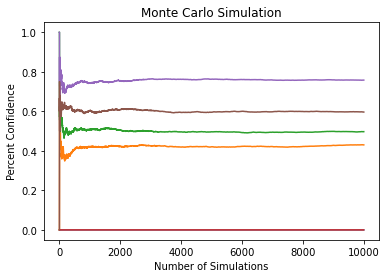

In [35]:
def get_graph(df, col_names, col_renames, pred_metric, feature_vector, score):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        vals = pd.Series(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))
        vals = (vals <= score).astype(int).cumsum()
        for x in range(len(vals)):
            vals.iloc[x] = vals.iloc[x] / (x+1)
        vals.plot()
    return
print('Mavericks PTS: \t' + str(get_graph(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS',[114.843903, 114, 109.6], 113)))
print('Opponent OPTS: \t' + str(get_graph(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS', [118.619597, 117, 116.8], 113)))

plt.title('Monte Carlo Simulation')
plt.ylabel('Percent Confidence')
plt.xlabel('Number of Simulations')
plt.show()





In [49]:
suns_pts = [112.20083999999999, 109.82131999999946, 110.75009999999965,124.3034, 110.9585, 111.0285]
mavs_pts = [117.4595, 116.5454, 120.3055, 112.16973999999999, 112.66921999999997, 115.97509999999967]
print("Mavs PTS: ", sum(mavs_pts)/6)
print("Suns PTS: ", sum(suns_pts)/6)

Mavs PTS:  115.85407666666661
Suns PTS:  113.17710999999986
